In [1]:
from pandas_datareader import data as pdr
from datetime import datetime,date
import pandas as pd
import yfinance as yf
yf.pdr_override()


from datetime import datetime
startdate = datetime(2015,1,1)
today = date.today()
enddate = today

# data = pd.read_csv("TATASTEEL.NS.csv")

df = pdr.get_data_yahoo("TATASTEEL.NS", start=startdate, end=enddate)

# dates = pd.to_datetime(data["Date"])
cols = list(df)[:7]
data = df[cols].astype(float)
data


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-01,37.833172,38.681107,37.833172,38.533432,14.594913,26570816.0
2015-01-02,38.681107,39.348022,38.681107,39.133656,14.822251,36043328.0
2015-01-05,39.348022,40.153084,39.348022,39.700535,15.036963,54638866.0
2015-01-06,39.443295,39.443295,37.571171,37.776009,14.308030,64767961.0
2015-01-07,37.899864,37.899864,36.546978,37.051926,14.033774,49846923.0
...,...,...,...,...,...,...
2023-03-29,102.500000,104.500000,101.650002,103.599998,103.599998,37221124.0
2023-03-31,105.000000,105.500000,104.099998,104.500000,104.500000,34579415.0
2023-04-03,105.099998,105.250000,103.800003,104.099998,104.099998,21840428.0


In [2]:
days = 14


delta = data["Close"].diff()
up = delta.clip(lower=0)
down = -1 * delta.clip(upper=0)
average_up = up.ewm(com=(days - 1), adjust=False).mean()
average_down = down.ewm(com=(days - 1), adjust=False).mean()
rs = average_up / average_down

data['RSI'] = 100 - (100 / (1 + rs))

data = data.iloc[days:]

# data = data['RSI']
data = data[1:]
data

,Open,High,Low,Close,Adj Close,Volume,RSI
Date,,,,,,,
2015-01-22,37.918919,38.557251,37.728371,38.433395,14.557021,47523195.0,67.978598
2015-01-23,39.062202,39.252750,38.014191,38.404812,14.546196,47511356.0,67.754910
2015-01-27,38.376232,38.490559,37.680733,37.957027,14.376594,41693694.0,64.191345
2015-01-28,37.823643,37.823643,37.051926,37.266293,14.114973,41936541.0,59.033486
2015-01-29,37.185310,37.385384,36.556503,37.194839,14.087909,54190694.0,58.509746
...,...,...,...,...,...,...,...
2023-03-29,102.500000,104.500000,101.650002,103.599998,103.599998,37221124.0,40.867752
2023-03-31,105.000000,105.500000,104.099998,104.500000,104.500000,34579415.0,43.932304
2023-04-03,105.099998,105.250000,103.800003,104.099998,104.099998,21840428.0,42.868925


In [3]:
# data = data[['Close',"RSI"]]
data = data[['Close','RSI']]
data

,Close,RSI
Date,,
2015-01-22,38.433395,67.978598
2015-01-23,38.404812,67.754910
2015-01-27,37.957027,64.191345
2015-01-28,37.266293,59.033486
2015-01-29,37.194839,58.509746
...,...,...
2023-03-29,103.599998,40.867752
2023-03-31,104.500000,43.932304
2023-04-03,104.099998,42.868925


In [4]:
data.shape

(2026, 2)

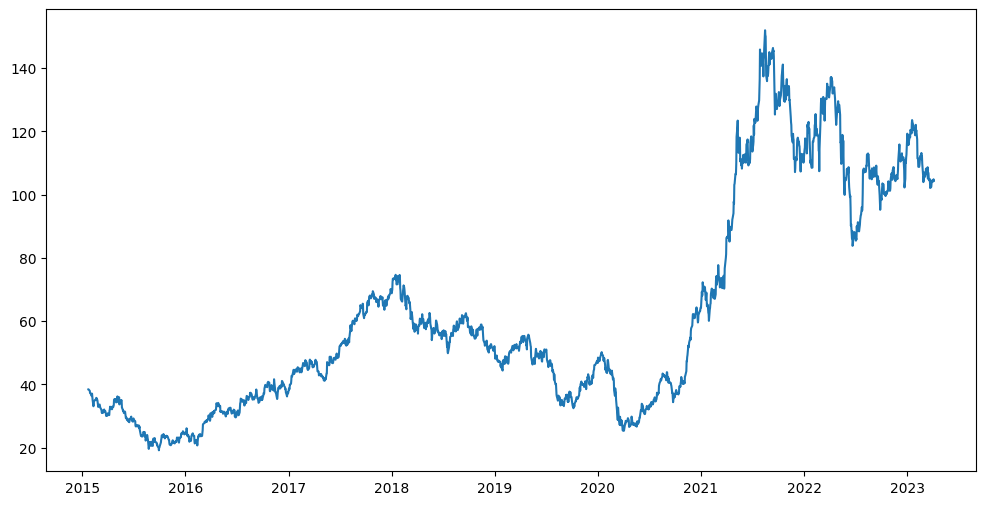

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.plot(data["Close"])

In [6]:
import numpy as np


In [7]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler(feature_range=(0,1))
# print(df)
data = scaler.fit_transform(data)

print(data)

# print(scaler.inverse_transform(df))

[[0.14497181 0.69942254]
 [0.14475649 0.69621953]
 [0.1413834  0.64519244]
 ...
 [0.63962845 0.33987435]
 [0.64527809 0.37799438]
 [0.64151166 0.35688911]]


In [8]:
data = np.array(data)
train_size = int(len(data)*0.85)
train_data,test_data = data[:train_size] ,data[train_size:]
train_data,test_data

(array([[0.14497181, 0.69942254],
        [0.14475649, 0.69621953],
        [0.1413834 , 0.64519244],
        ...,
        [0.70685915, 0.38034966],
        [0.71962733, 0.4347872 ],
        [0.77533273, 0.61377748]]),
 array([[0.76964545, 0.59025842],
        [0.78181098, 0.62291112],
        [0.75552135, 0.51702784],
        [0.7666323 , 0.54971006],
        [0.76444776, 0.54091173],
        [0.73657624, 0.43662055],
        [0.68346963, 0.28882105],
        [0.69092719, 0.3153253 ],
        [0.6752965 , 0.27737412],
        [0.67250932, 0.27063896],
        [0.67318731, 0.27346937],
        [0.73480602, 0.48391174],
        [0.73491901, 0.48422828],
        [0.73424108, 0.48193449],
        [0.74154789, 0.5048675 ],
        [0.74659495, 0.5209422 ],
        [0.77416515, 0.60151284],
        [0.77623669, 0.60715005],
        [0.79582209, 0.65865264],
        [0.80041713, 0.6701764 ],
        [0.74949505, 0.46627495],
        [0.76523874, 0.51267357],
        [0.75322383, 0.47157007],

In [9]:
def CreateDataset(dataset,time_steps):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_steps-1):
        
        dataX.append(dataset[i:i+time_steps])
        dataY.append(dataset[i+time_steps,0])
    return np.array(dataX),np.array(dataY)
    
    

In [10]:
time_steps = 50
train_x,train_y = CreateDataset(train_data,time_steps)
test_x,test_y = CreateDataset(test_data,time_steps)

In [11]:
train_x.shape[2],train_y.shape

(2, (1671,))

In [12]:
# train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
# test_x  = test_x.reshape((test_x.shape[0],test_x.shape[1],1))

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.layers import LSTM




In [14]:

model = Sequential()
model.add(LSTM(50,activation='relu',return_sequences=True,input_shape=(train_x.shape[1],train_x.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(optimizer='adam',loss="mse")

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10600     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 51,051
Trainable params: 51,051
Non-trainable params: 0
_________________________________________________________________


In [16]:
train_x.shape,train_y.shape

((1671, 50, 2), (1671,))

In [23]:
from tensorflow.keras.models import load_model
model = load_model('my_model_2.h5')

In [207]:
model.fit(train_x,train_y,validation_data=(train_x,train_y),epochs=50,batch_size=16,verbose=1,validation_split=0.1)

Epoch 1/50
105/105 [==============================] - 16s 91ms/step - loss: 0.0129 - val_loss: 0.0021
Epoch 2/50
105/105 [==============================] - 9s 81ms/step - loss: 0.0019 - val_loss: 0.0010
Epoch 3/50
105/105 [==============================] - 8s 79ms/step - loss: 0.0017 - val_loss: 5.6809e-04
Epoch 4/50
105/105 [==============================] - 8s 80ms/step - loss: 0.0015 - val_loss: 5.9496e-04
Epoch 5/50
105/105 [==============================] - 9s 83ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 6/50
105/105 [==============================] - 9s 81ms/step - loss: 0.0017 - val_loss: 5.6506e-04
Epoch 7/50
105/105 [==============================] - 8s 80ms/step - loss: 0.0015 - val_loss: 9.4161e-04
Epoch 8/50
105/105 [==============================] - 8s 81ms/step - loss: 0.0012 - val_loss: 5.0237e-04
Epoch 9/50
105/105 [==============================] - 8s 81ms/step - loss: 0.0013 - val_loss: 5.3412e-04
Epoch 10/50
105/105 [==============================] - 8s 80ms/ste

In [26]:
predict = model.predict(test_x)

print(1-np.square(predict-test_y).mean())

8/8 [==============================] - 0s 35ms/step
0.9858800771212464


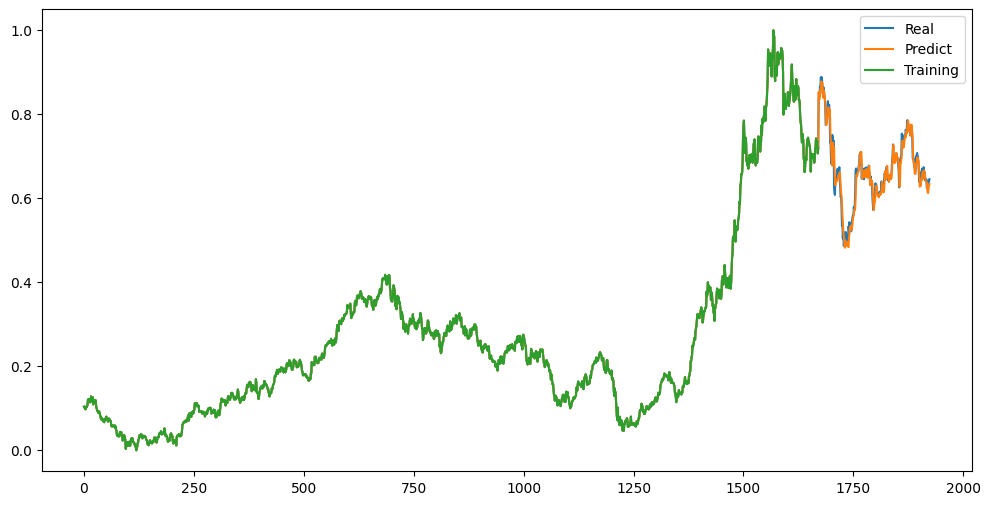

In [27]:
plt.figure(figsize=(12,6))
# plt.plot(data)
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,predict))
plt.plot(train_y)
plt.legend(["Real",'Predict','Training'])


In [28]:
future = 100
lists = np.array(test_x[0]).reshape(1,test_x.shape[1],test_x.shape[2])
preds =[]
l=[]
for i in range(len(test_x)-1):
    print(i)
    pred = model.predict(lists[i].reshape(1,time_steps,2))
#     [[1,2,3],[2,3,4],[5,6,7]]
    
    pred = np.append(pred,test_x[i+1][-1][1])
#     print(pred.reshape(1,2))
    l = np.vstack([lists[i],pred])
    preds.append(pred[0])
    l = l[1:]
    lists = np.vstack([lists,l.reshape(1,time_steps,2)])
print(preds)
print(lists)

0
1/1 [==============================] - 0s 105ms/step
1
1/1 [==============================] - 0s 108ms/step
2
1/1 [==============================] - 0s 93ms/step
3
1/1 [==============================] - 0s 102ms/step
4
1/1 [==============================] - 0s 99ms/step
5
1/1 [==============================] - 0s 103ms/step
6
1/1 [==============================] - 0s 91ms/step
7
1/1 [==============================] - 0s 129ms/step
8
1/1 [==============================] - 0s 83ms/step
9
1/1 [==============================] - 0s 82ms/step
10
1/1 [==============================] - 0s 78ms/step
11
1/1 [==============================] - 0s 68ms/step
12
1/1 [==============================] - 0s 63ms/step
13
1/1 [==============================] - 0s 80ms/step
14
1/1 [==============================] - 0s 85ms/step
15
1/1 [==============================] - 0s 102ms/step
16
1/1 [==============================] - 0s 94ms/step
17
1/1 [==============================] - 0s 104ms/step
18
1/1 [=====

KeyboardInterrupt: 

In [219]:
future = 1750
lists = np.array(train_x[0]).reshape(1,train_x.shape[1],train_x.shape[2])
preds =[]
l=[]
for i in range(len(train_x)-1):
    print(i)
    pred = model.predict(lists[i].reshape(1,time_steps,2))
#     [[1,2,3],[2,3,4],[5,6,7]]
    
    pred = np.append(pred,train_x[i+1][-1][1])
#     print(pred.reshape(1,2))
    l = np.vstack([lists[i],pred])
    preds.append(pred[0])
    l = l[1:]
    lists = np.vstack([lists,l.reshape(1,time_steps,2)])
print(preds)
print(lists)

0
1/1 [==============================] - 0s 37ms/step
1
1/1 [==============================] - 0s 35ms/step
2
1/1 [==============================] - 0s 35ms/step
3
1/1 [==============================] - 0s 37ms/step
4
1/1 [==============================] - 0s 35ms/step
5
1/1 [==============================] - 0s 38ms/step
6
1/1 [==============================] - 0s 39ms/step
7
1/1 [==============================] - 0s 37ms/step
8
1/1 [==============================] - 0s 37ms/step
9
1/1 [==============================] - 0s 37ms/step
10
1/1 [==============================] - 0s 52ms/step
11
1/1 [==============================] - 0s 55ms/step
12
1/1 [==============================] - 0s 45ms/step
13
1/1 [==============================] - 0s 44ms/step
14
1/1 [==============================] - 0s 38ms/step
15
1/1 [==============================] - 0s 39ms/step
16
1/1 [==============================] - 0s 38ms/step
17
1/1 [==============================] - 0s 33ms/step
18
1/1 [============

1/1 [==============================] - 0s 43ms/step
295
1/1 [==============================] - 0s 34ms/step
296
1/1 [==============================] - 0s 36ms/step
297
1/1 [==============================] - 0s 39ms/step
298
1/1 [==============================] - 0s 39ms/step
299
1/1 [==============================] - 0s 91ms/step
300
1/1 [==============================] - 0s 86ms/step
301
1/1 [==============================] - 0s 45ms/step
302
1/1 [==============================] - 0s 40ms/step
303
1/1 [==============================] - 0s 46ms/step
304
1/1 [==============================] - 0s 39ms/step
305
1/1 [==============================] - 0s 41ms/step
306
1/1 [==============================] - 0s 54ms/step
307
1/1 [==============================] - 0s 52ms/step
308
1/1 [==============================] - 0s 36ms/step
309
1/1 [==============================] - 0s 38ms/step
310
1/1 [==============================] - 0s 47ms/step
311
1/1 [==============================] - 0s 79ms/s

1/1 [==============================] - 0s 36ms/step
587
1/1 [==============================] - 0s 36ms/step
588
1/1 [==============================] - 0s 34ms/step
589
1/1 [==============================] - 0s 39ms/step
590
1/1 [==============================] - 0s 47ms/step
591
1/1 [==============================] - 0s 38ms/step
592
1/1 [==============================] - 0s 34ms/step
593
1/1 [==============================] - 0s 37ms/step
594
1/1 [==============================] - 0s 41ms/step
595
1/1 [==============================] - 0s 36ms/step
596
1/1 [==============================] - 0s 35ms/step
597
1/1 [==============================] - 0s 33ms/step
598
1/1 [==============================] - 0s 35ms/step
599
1/1 [==============================] - 0s 35ms/step
600
1/1 [==============================] - 0s 37ms/step
601
1/1 [==============================] - 0s 35ms/step
602
1/1 [==============================] - 0s 38ms/step
603
1/1 [==============================] - 0s 36ms/s

1/1 [==============================] - 0s 35ms/step
879
1/1 [==============================] - 0s 41ms/step
880
1/1 [==============================] - 0s 42ms/step
881
1/1 [==============================] - 0s 36ms/step
882
1/1 [==============================] - 0s 41ms/step
883
1/1 [==============================] - 0s 45ms/step
884
1/1 [==============================] - 0s 41ms/step
885
1/1 [==============================] - 0s 42ms/step
886
1/1 [==============================] - 0s 42ms/step
887
1/1 [==============================] - 0s 42ms/step
888
1/1 [==============================] - 0s 37ms/step
889
1/1 [==============================] - 0s 41ms/step
890
1/1 [==============================] - 0s 42ms/step
891
1/1 [==============================] - 0s 35ms/step
892
1/1 [==============================] - 0s 35ms/step
893
1/1 [==============================] - 0s 41ms/step
894
1/1 [==============================] - 0s 47ms/step
895
1/1 [==============================] - 0s 43ms/s

1024
1/1 [==============================] - 0s 36ms/step
1025
1/1 [==============================] - 0s 36ms/step
1026
1/1 [==============================] - 0s 33ms/step
1027
1/1 [==============================] - 0s 36ms/step
1028
1/1 [==============================] - 0s 38ms/step
1029
1/1 [==============================] - 0s 34ms/step
1030
1/1 [==============================] - 0s 38ms/step
1031
1/1 [==============================] - 0s 36ms/step
1032
1/1 [==============================] - 0s 35ms/step
1033
1/1 [==============================] - 0s 36ms/step
1034
1/1 [==============================] - 0s 36ms/step
1035
1/1 [==============================] - 0s 34ms/step
1036
1/1 [==============================] - 0s 38ms/step
1037
1/1 [==============================] - 0s 41ms/step
1038
1/1 [==============================] - 0s 40ms/step
1039
1/1 [==============================] - 0s 40ms/step
1040
1/1 [==============================] - 0s 38ms/step
1041
1/1 [=====================

1/1 [==============================] - 0s 39ms/step
1311
1/1 [==============================] - 0s 36ms/step
1312
1/1 [==============================] - 0s 37ms/step
1313
1/1 [==============================] - 0s 46ms/step
1314
1/1 [==============================] - 0s 44ms/step
1315
1/1 [==============================] - 0s 43ms/step
1316
1/1 [==============================] - 0s 36ms/step
1317
1/1 [==============================] - 0s 35ms/step
1318
1/1 [==============================] - 0s 44ms/step
1319
1/1 [==============================] - 0s 44ms/step
1320
1/1 [==============================] - 0s 36ms/step
1321
1/1 [==============================] - 0s 35ms/step
1322
1/1 [==============================] - 0s 38ms/step
1323
1/1 [==============================] - 0s 47ms/step
1324
1/1 [==============================] - 0s 49ms/step
1325
1/1 [==============================] - 0s 37ms/step
1326
1/1 [==============================] - 0s 39ms/step
1327
1/1 [==========================

1/1 [==============================] - 0s 40ms/step
1597
1/1 [==============================] - 0s 37ms/step
1598
1/1 [==============================] - 0s 37ms/step
1599
1/1 [==============================] - 0s 35ms/step
1600
1/1 [==============================] - 0s 36ms/step
1601
1/1 [==============================] - 0s 36ms/step
1602
1/1 [==============================] - 0s 36ms/step
1603
1/1 [==============================] - 0s 40ms/step
1604
1/1 [==============================] - 0s 37ms/step
1605
1/1 [==============================] - 0s 36ms/step
1606
1/1 [==============================] - 0s 38ms/step
1607
1/1 [==============================] - 0s 38ms/step
1608
1/1 [==============================] - 0s 36ms/step
1609
1/1 [==============================] - 0s 36ms/step
1610
1/1 [==============================] - 0s 34ms/step
1611
1/1 [==============================] - 0s 38ms/step
1612
1/1 [==============================] - 0s 35ms/step
1613
1/1 [==========================

In [220]:
preds = np.array(preds)


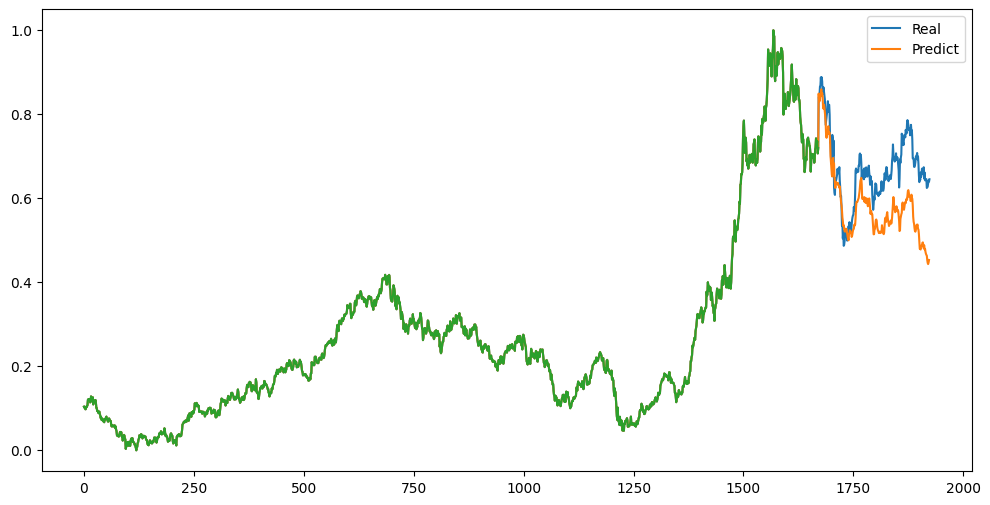

In [218]:
plt.figure(figsize=(12,6))
# plt.plot(data["Close"])
plt.plot(np.append(train_y,test_y))
plt.plot(np.append(train_y,preds))
plt.plot(train_y)
plt.legend(["Real",'Predict'])

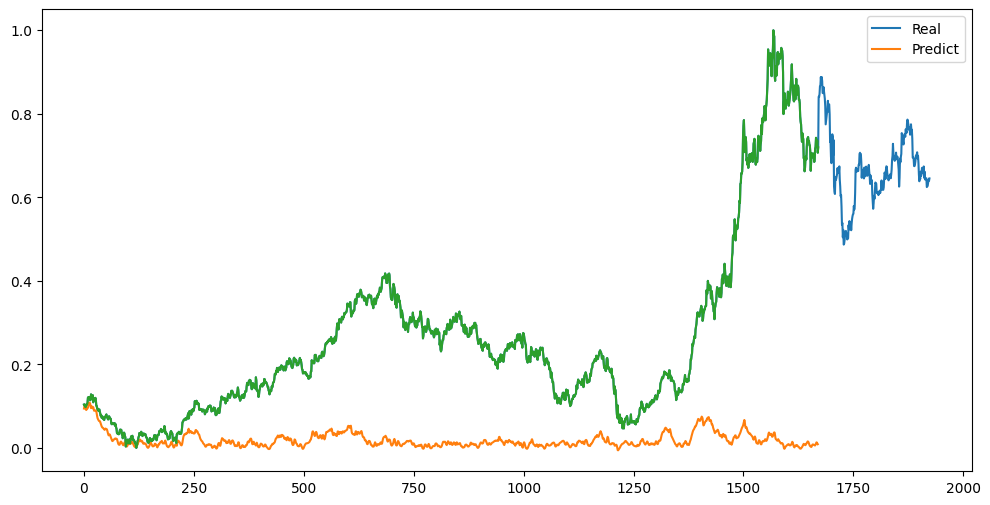

In [222]:
plt.figure(figsize=(12,6))
# plt.plot(data["Close"])
plt.plot(np.append(train_y,test_y))
plt.plot(preds)
plt.plot(train_y)
plt.legend(["Real",'Predict'])